In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

In [2]:
export_data = pd.read_excel ('monthly export amount1.xlsx')
export_data

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
1,38223018,35866026,41532719,39443013,39852981,39387232,35048576,37669038,35534156,37291389,...,51935479,49858132,55511984,51068508,48912380,49320631,49234963,50888374,47479186,49775699


In [3]:
export_data = export_data.transpose()

In [4]:
export_data.columns = ['ds','y']
export_data

,ds,y
0,2007-01-01,38223018
1,2007-02-01,35866026
2,2007-03-01,41532719
3,2007-04-01,39443013
4,2007-05-01,39852981
...,...,...
151,2019-08-01,49320631
152,2019-09-01,49234963
153,2019-10-01,50888374
154,2019-11-01,47479186


In [5]:
export_data.dtypes

ds    datetime64[ns]
y             object
dtype: object

In [6]:
export_data['y'] = export_data['y'].astype(int)

In [7]:
export_data.dtypes

ds    datetime64[ns]
y              int32
dtype: object

In [8]:
from chronos import Chronos
import chronos_plotting

Employing Maximum A Posteriori
100.0% - ELBO loss: -1.0732 | Mean Absolute Error: 1365831.8750                                     


C:\Users\omran\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


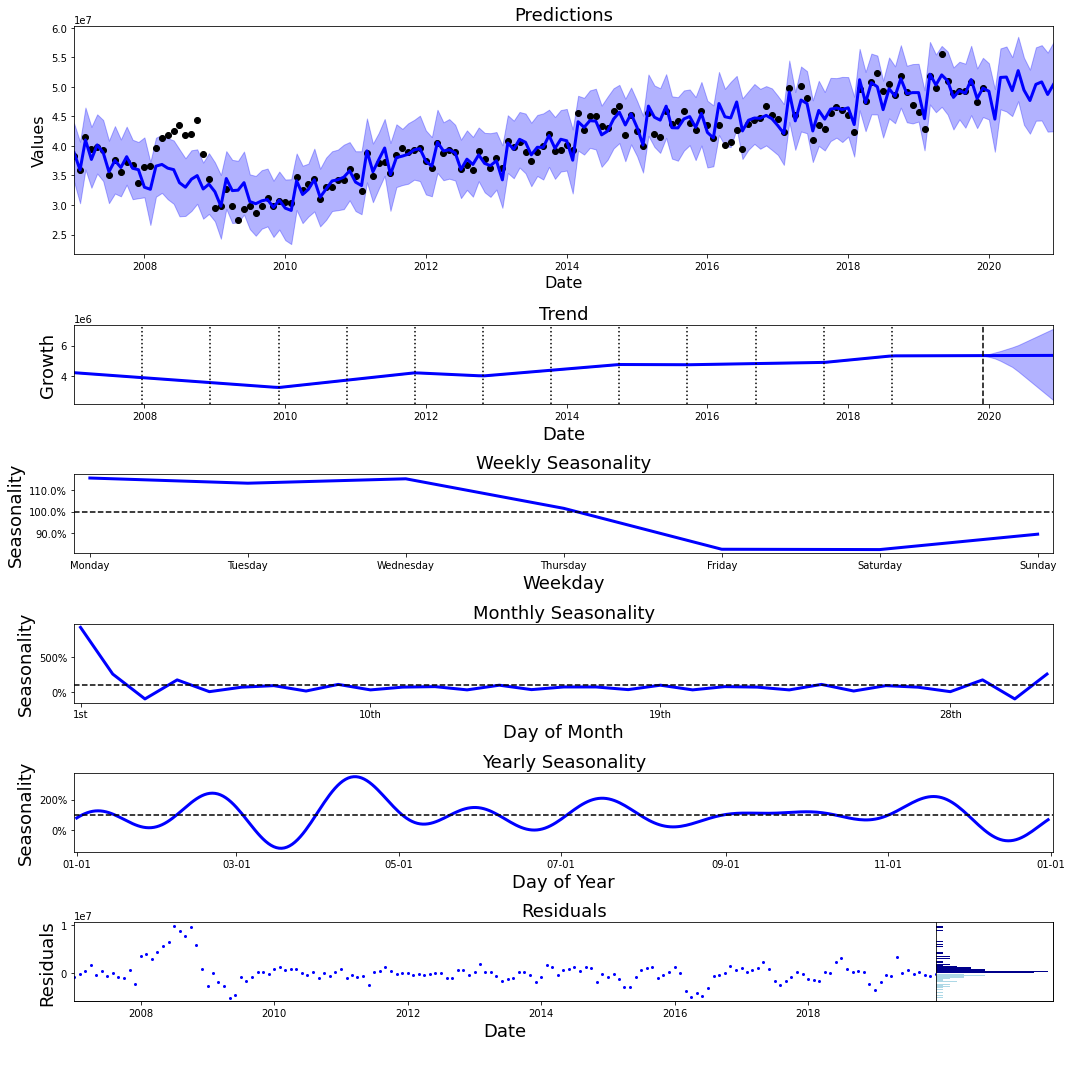

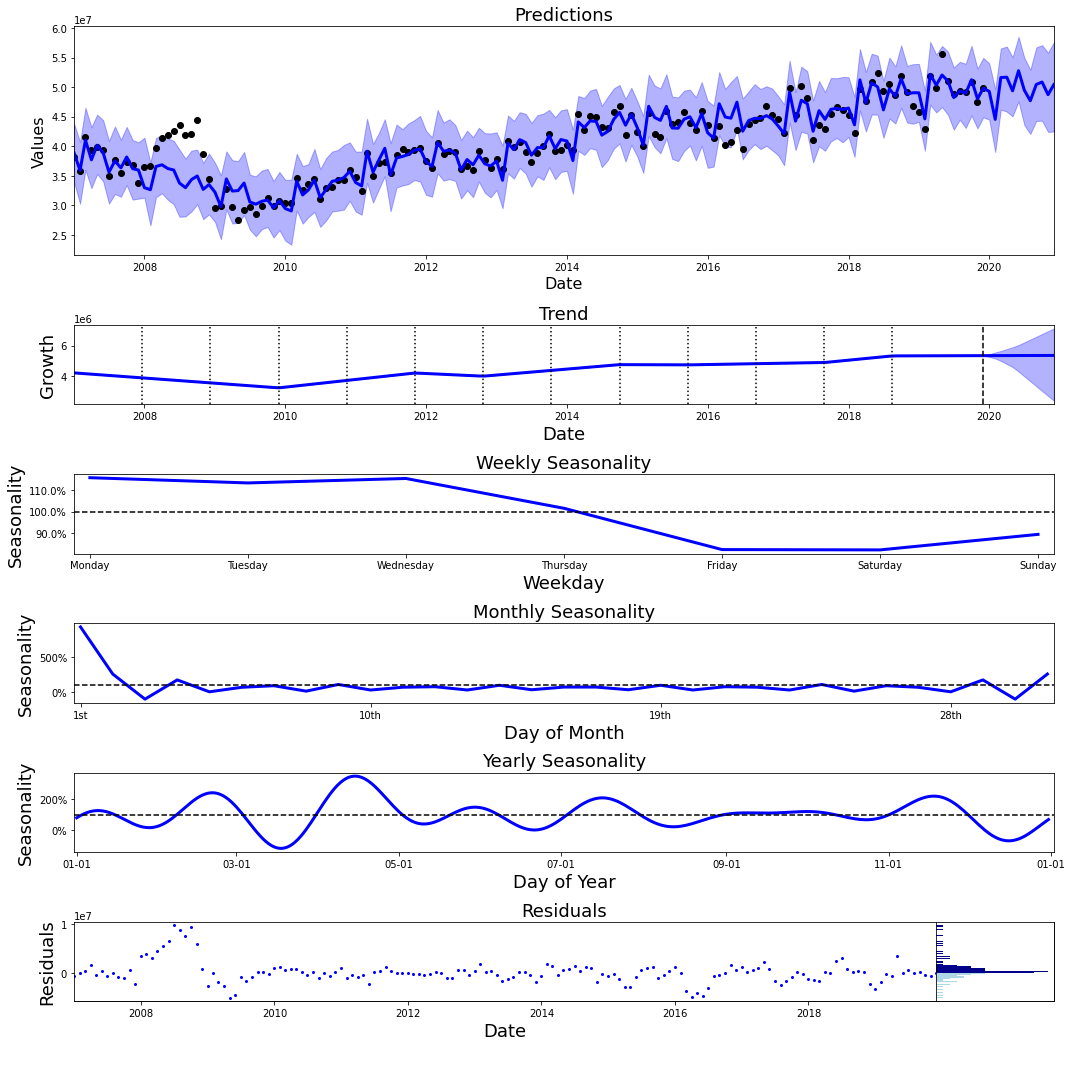

In [9]:
my_chronos = Chronos(n_changepoints=12, year_seasonality_order=8, month_seasonality_order=12,
                     weekly_seasonality_order=4, learning_rate=0.2, changepoint_range=0.9, 
                     seasonality_mode="mul", distribution="StudentT", max_iter=40000)

my_chronos.fit(export_data)
predictions = my_chronos.predict(frequency='MS', sample_number=4000, period=12)

chronos_plotting.plot_components(predictions, my_chronos)

In [10]:
predictions.tail(12)

,ds,y,yhat,yhat_upper,yhat_lower,trend,trend_upper,trend_lower
156,2020-01-01,NaN,4.926484e+07,5.401619e+07,4.449090e+07,5.343438e+06,5.445817e+06,5.263613e+06
157,2020-02-01,NaN,4.454768e+07,4.963907e+07,3.902682e+07,5.344500e+06,5.550157e+06,5.159456e+06
158,2020-03-01,NaN,5.160899e+07,5.652659e+07,4.620984e+07,5.345612e+06,5.647768e+06,5.000885e+06
159,2020-04-01,NaN,5.167626e+07,5.685478e+07,4.584696e+07,5.346728e+06,5.772482e+06,4.797743e+06
160,2020-05-01,NaN,4.937254e+07,5.504169e+07,4.505707e+07,5.348029e+06,5.891940e+06,4.601155e+06
161,2020-06-01,NaN,5.276375e+07,5.850011e+07,4.758409e+07,5.349474e+06,6.034188e+06,4.308690e+06
162,2020-07-01,NaN,4.947182e+07,5.495830e+07,4.358857e+07,5.351018e+06,6.211032e+06,3.998039e+06
163,2020-08-01,NaN,4.769483e+07,5.292504e+07,4.208388e+07,5.352776e+06,6.393772e+06,3.677028e+06
164,2020-09-01,NaN,5.043668e+07,5.670937e+07,4.428379e+07,5.354347e+06,6.576512e+06,3.356018e+06
165,2020-10-01,NaN,5.085597e+07,5.708172e+07,4.431273e+07,5.355485e+06,6.753353e+06,3.045367e+06


In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt



In [12]:
print("RMSE: ",sqrt(mean_squared_error(export_data['y'].values, predictions['yhat'].iloc[0:156].values))/10000000)

RMSE:  0.22685814415318686


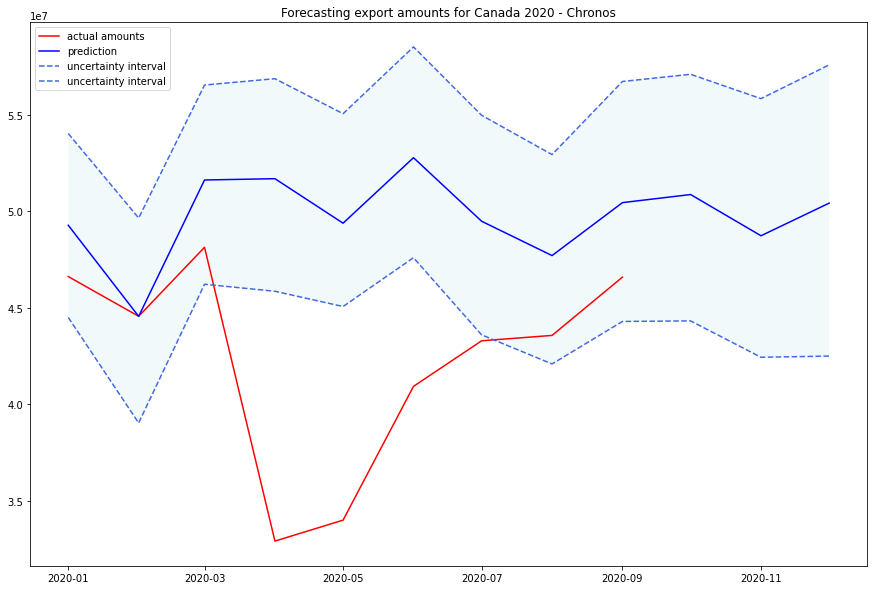

In [13]:
updated = [4.6608801e+07, 4.4552607e+07, 4.8124904e+07, 3.2910612e+07, 3.3996310e+07, 4.0922677e+07, 4.3282830e+07, 
           4.3560689e+07, 4.6579007e+07]

plt.figure(figsize=(15,10))

plt.plot(predictions['ds'].iloc[156:165], updated, c="red", label="actual amounts" )
plt.plot(predictions['ds'].iloc[156:], predictions['yhat'].iloc[156:].values, c="blue", label="prediction")
plt.plot(predictions['ds'].iloc[156:], predictions['yhat_lower'].iloc[156:].values, c="royalblue", label="uncertainty interval", linestyle='--')
plt.plot(predictions['ds'].iloc[156:], predictions['yhat_upper'].iloc[156:].values, c="royalblue", label="uncertainty interval", linestyle='--')
plt.title("Forecasting export amounts for Canada 2020 - Chronos")
ax = plt.gca()
ax.fill_between(predictions['ds'].iloc[156:],  predictions['yhat_lower'].iloc[156:], predictions['yhat_upper'].iloc[156:],
                facecolor='lightblue', alpha=0.15, interpolate=True)
plt.legend()
plt.show();